In [272]:
!pip install numpy==1.24.4 --no-cache-dir --force-reinstall

python(616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 40.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


Header Information:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                43200                                                  
NAXIS2  =                10320                                                  
NAXIS3  =                    3                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =              21601.0 / Pixel coordinate of reference point            
CRPIX2  =               7560.5 / Pixel coordinate of reference point            
CDELT1  =  -0.0083333333333333 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0083333333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  

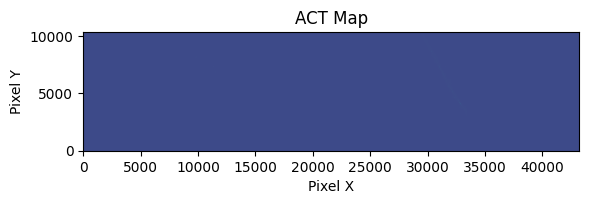

In [274]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval, ImageNormalize


Home = "/Users/yi/Documents/CMB_SZ"
# Load the FITS file
filename = Home + '/ACTxDESI/s22_product/act_planck_s08_s22_ftot_night_map.fits'
with fits.open(filename) as hdul:
    # Print header information
    header = hdul[0].header
    print("Header Information:")
    print(repr(header))
    
    # Load the data from the primary HDU (Header Data Unit)
    data = hdul[0].data

    hdul.info()
# Plot the data

cmin, cmax = np.min(data), np.max(data)
plt.imshow(data[0],vmin = cmin, vmax= cmax,  origin='lower', cmap='viridis')
#plt.colorbar(label='Compton y')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('ACT Map')
plt.show()


KeyError: 0

Header Information:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                43200                                                  
NAXIS2  =                10320                                                  
NAXIS3  =                    3                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =              21601.0 / Pixel coordinate of reference point            
CRPIX2  =               7560.5 / Pixel coordinate of reference point            
CDELT1  =  -0.0083333333333333 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0083333333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  

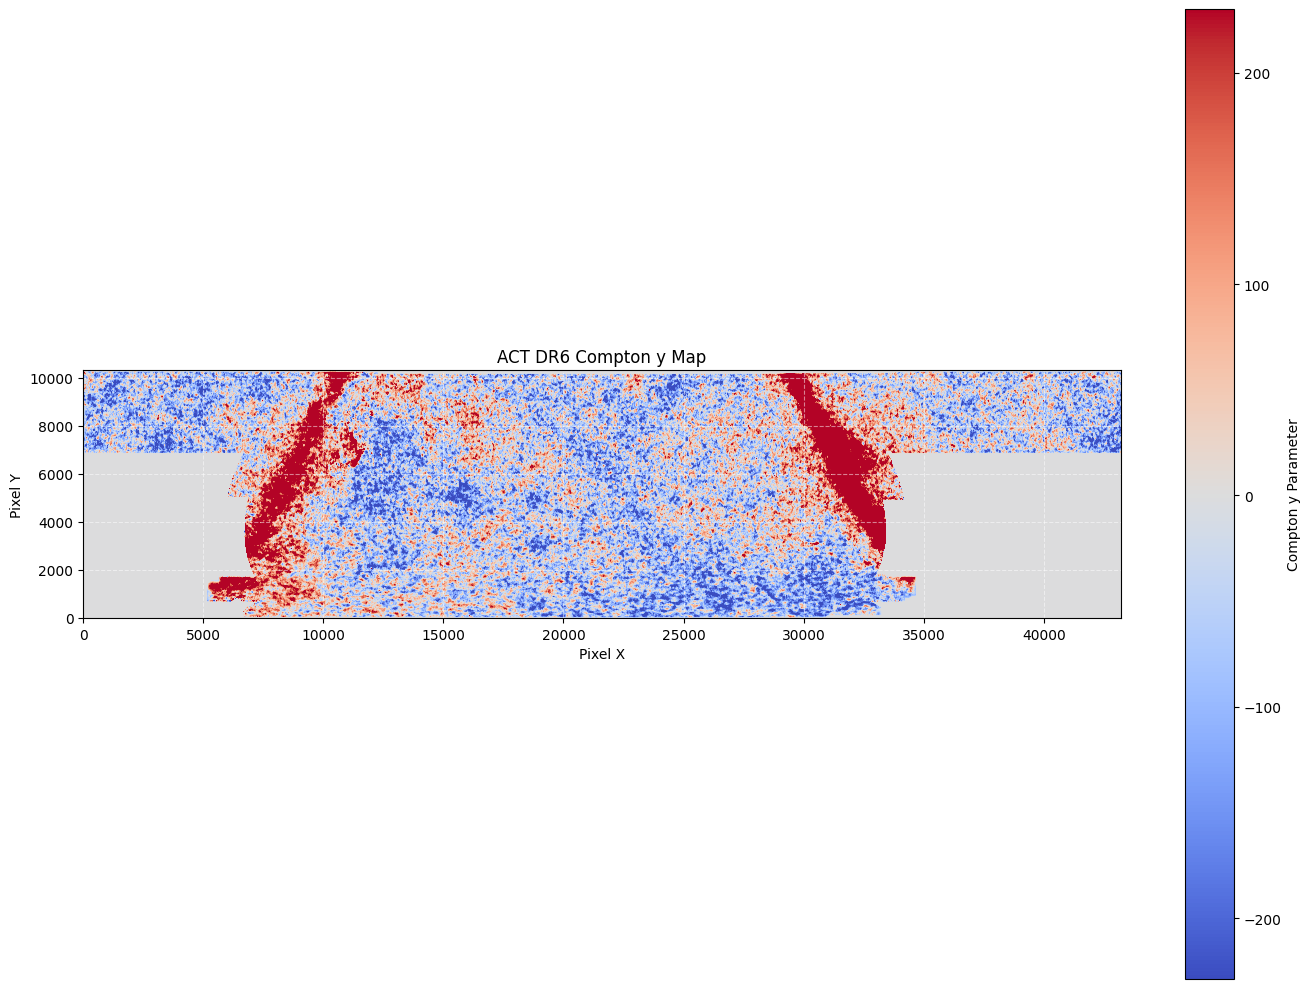

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval, ImageNormalize


# Define the path to your data
Home = "/Users/yi/Documents/CMB_SZ"
filename = Home + '/ACTxDESI/s22_product/act_planck_s08_s22_ftot_night_map.fits'

# Load the FITS file
with fits.open(filename) as hdul:
    header = hdul[0].header
    data = hdul[0].data

    # Print some header information for context
    print("Header Information:")
    print(repr(header))
    hdul.info()

# Calculate vmin and vmax using percentiles to ignore outliers
vmin = np.percentile(data, 10)
vmax = np.percentile(data, 90)

# Set up a larger figure size for better visibility
plt.figure(figsize=(14, 10))
plt.imshow(data[0], origin='lower', cmap='coolwarm', norm = ImageNormalize(data, interval=ZScaleInterval()))
plt.colorbar(label='Compton y Parameter')

# Add axis labels, title, and grid
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('ACT DR6 Compton y Map')
plt.grid(color='white', linestyle='--', alpha=0.5)

# Adjust layout to fit everything nicely
plt.tight_layout()
plt.show()


In [159]:
import numpy as np
from astropy.io import fits
from pixell import enmap
import matplotlib.pyplot as plt

pix_arcmin = 0.5  #each pixel is 0.5 arcmins 
resolution_factor =  1/pix_arcmin 

def extract_submaps(fits_file, catalog_file, output_dir, submap_size=18.0):

    map_data = enmap.read_map(fits_file, hdu=0)
    wcs = map_data.wcs
    
    catalog_hdulist = fits.open(catalog_file)
    catalog_data = catalog_hdulist[1].data

    #ra = catalog_data['RADeg']
    #dec = catalog_data['decDeg']
    mass = catalog_data['M500c']
    
    # below are coordinated copied from table 7 of Hassefield paper
    ra = [2.0418, 3.0152, 3.7276, 4.4138, 4.5623, 5.5553, 6.5699, 11.1076, 11.3051, 12.7875, 14.5189, 14.7855, 16.2195, 19.9971, 21.8227, 24.8407, 28.1764, 29.1008, 31.5567, 33.8699, 34.5626, 34.9533, 34.9759, 35.3925, 35.7939, 37.1250, 37.7273, 39.9718, 40.0102, 40.3129, 41.4645, 42.5370, 44.1354, 45.2925, 45.4158, 45.8343, 47.0481, 50.1239, 51.7075, 54.2438, 55.5008, 55.6845, 57.1612, 57.1605, 306.3006, 312.6264, 312.6814, 312.7935, 312.7885, 313.8581, 314.7234, 322.1036, 322.4186, 322.5367, 323.7907, 323.8151, 323.9310, 328.2375, 328.6319, 329.0407, 335.1922, 337.3042, 343.3432, 345.6427, 346.9176, 351.8660, 354.4156, 357.9349]
    dec = [2.0204, -0.7693, -0.9502, -0.8580, -0.3795, -0.6050, 1.3367, 1.2221, -1.8827, 0.9323, 0.5106, -0.8326, 0.0495, 0.9193, 0.3468, -1.4769, 1.0059, -1.3879, -1.2428, 0.5091, -0.6883, 0.3755, 1.4973, -0.2063, -0.9466, 0.5033, -0.4043, -1.5758, 1.2693, -0.3109, -0.7013, 0.1403, 0.1049, -1.1716, 1.9219, 1.9214, 1.0607, 0.5399, -0.7312, -1.1705, 1.0873, -0.2899, 0.4892, -0.4681, 0.5130, -0.9311, 1.3857, 0.9488, 2.2628, 1.0985, 1.3836, 1.5996, 0.0891, 0.7590, -1.0396, 1.4247, 0.1568, -1.2458, -0.8197, 1.3857, -0.7095, -0.0743, -0.5280, 0.0419, 1.5161, -2.0777, 0.2690, 0.1538]
    
    # Define submap size in arcminutes and convert to radians
    submap_size_rad = np.deg2rad(submap_size / 60.0)

    
    for i, (ra_source, dec_source) in enumerate(zip(ra, dec)):

        pos = np.deg2rad([dec_source, ra_source])  # [DEC, RA] in radians
        # bounding box for the submap
        box = np.array([[pos[0] - submap_size_rad / 2, pos[1] - submap_size_rad / 2],
                        [pos[0] + submap_size_rad / 2, pos[1] + submap_size_rad / 2]])
        
        submap = enmap.submap(map_data, box=box)
        
        #if submap.shape()[0] != 36 or submap.shape()[1] != 36: 
            #print([dec_source, ra_source], submap.shape())
        # Save the submap to a FITS file
        submap_filename = f"{output_dir}/submap_{i}.fits"
        enmap.write_map(submap_filename, submap)
    
        
    

    print("Submaps extraction completed.")

In [160]:

fits_file = filename = Home + '/ymap/ilc_actplanck_ymap.fits'
catalog_file = '/Users/yi/Documents/CMB_SZ/DR5_cluster-catalog_v1.1.fits'
output_dir = "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/"
extract_submaps(fits_file, catalog_file, output_dir)

Submaps extraction completed.


Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_1.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_2.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_3.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_4.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_5.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_6.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_7.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_8.fits


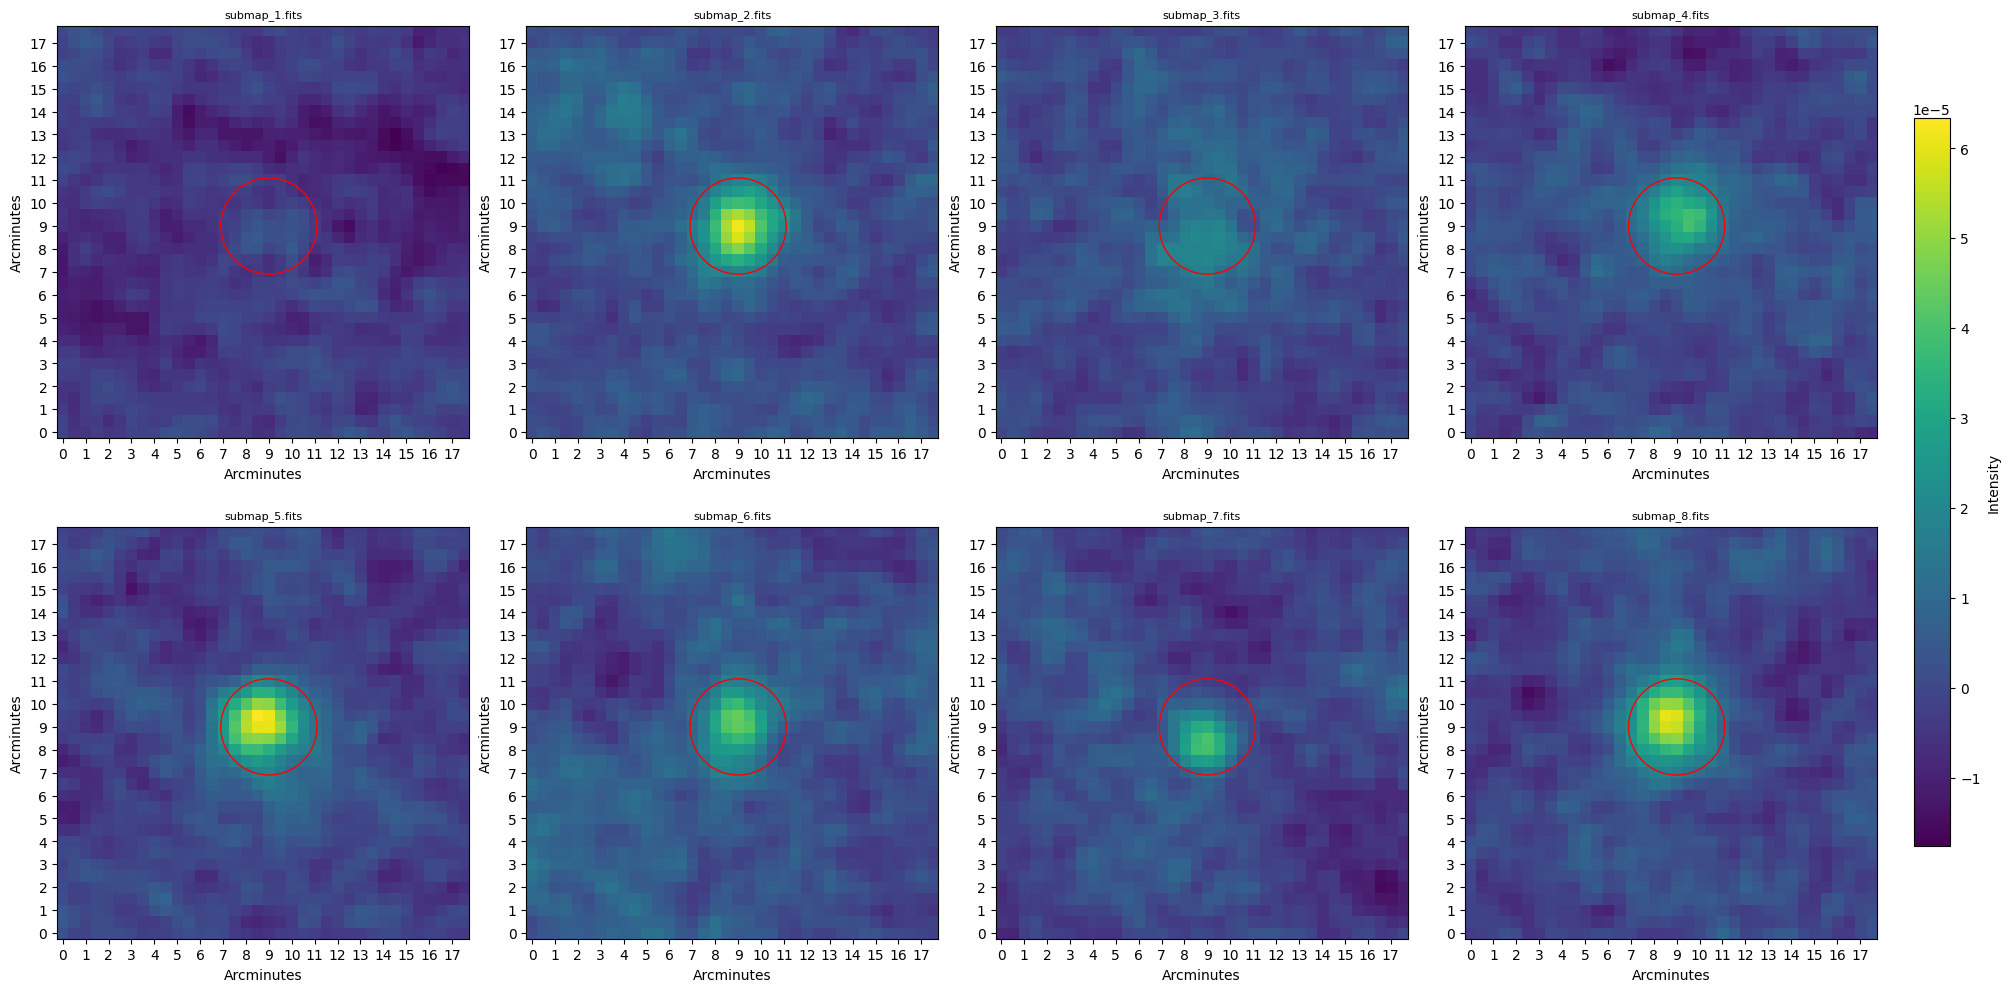

In [161]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from pixell import enmap

def plot_single_submap(ax, submap_file, radius, vmin=None, vmax=None):
    submap = enmap.read_map(submap_file)
    print(f"Plotting submap: {submap_file}")

    if len(submap.shape) > 2:
        submap = submap[0]

    # Set ticks every 2 pixels by resolution factor

    ax.set_xticks(np.arange(0, submap.shape[1], resolution_factor))
    ax.set_yticks(np.arange(0, submap.shape[0], resolution_factor))

    # Adjust tick labels to count every 2 pixels as one unit
    ax.set_xticklabels(np.arange(0, submap.shape[1] // 2))
    ax.set_yticklabels(np.arange(0, submap.shape[0] // 2))
    
    im = ax.imshow(submap, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    circle = plt.Circle((submap.shape[1]//2, submap.shape[0]//2), radius, color='r', fill=False)
    ax.add_artist(circle)
    ax.set_title(submap_file.split('/')[-1], fontsize=8)  # Label by file name
    ax.set_xlabel('Arcminutes')
    ax.set_ylabel('Arcminutes')
    ax.grid(False)
    return im

def plot_multiple_submaps(submap_files, radius, nrows, ncols, figsize=(20, 10), output_file='submaps_table.png'):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Find global min and max for consistent color scaling
    min_val, max_val = np.inf, -np.inf
    for submap_file in submap_files:
        submap = enmap.read_map(submap_file)
        if len(submap.shape) > 2:
            submap = submap[0]
        min_val = min(min_val, submap.min())
        max_val = max(max_val, submap.max())
    
    # Plot each submap
    for i, submap_file in enumerate(submap_files):
        if i < len(axes):  # Ensure we don't try to plot more submaps than subplots
            im = plot_single_submap(axes[i], submap_file, radius, vmin=min_val, vmax=max_val)
    
    # Hide any remaining empty subplots
    for i in range(len(submap_files), len(axes)):
        axes[i].axis('off')
    
    # Add a single color bar on the right-hand side
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
    cbar.set_label('Intensity')

    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

# Example usage
submap_files = [
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_1.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_2.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_3.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_4.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_5.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_6.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_7.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_8.fits",

]
radius = 2.1*resolution_factor
plot_multiple_submaps(submap_files, radius, nrows=2, ncols=4)




In [15]:
import numpy as np
from astropy.io import fits
from pixell import enmap
import os

def stack_submaps(submap_dir, output_file):
    # List all submap 
    submap_files = [os.path.join(submap_dir, f) for f in os.listdir(submap_dir) if f.endswith('.fits')]
    
    #get shape and initialize the stack
    first_submap = enmap.read_map(submap_files[0])
    stack = np.zeros_like(first_submap)
    count = 0
    
    bad_count = 0  # for weried shaped submap count 
    total_items = len(submap_files)
    milestones = [total_items * i // 10 for i in range(1, 11)]
    for submap_file in submap_files:
        submap = enmap.read_map(submap_file)
        if submap.shape[0] != 36 or submap.shape[1] != 36 : 
            bad_count += 1
            print("This file", submap_file,"has shape", submap.shape,"Total bad submap", bad_count)
            continue
        if count + 1 in milestones:  # i + 1 because progress is 1-based
            progress = (count + 1) / total_items * 100
            print(f"stacking: {int(progress)}% complete")
        stack += submap
        count += 1
    print("Stacking complete!")
    # Average 
    stack /= count
    
    enmap.write_map(output_file, stack)
    print(f"Stacking completed. Stacked map saved as {output_file}")



In [163]:

submap_dir = "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/"
output_file = "/Users/yi/Documents/CMB_SZ/stacked_map_hasselfield.fits"
stack_submaps(submap_dir, output_file)

stacking: 8% complete
stacking: 19% complete
stacking: 29% complete
stacking: 39% complete
stacking: 50% complete
stacking: 58% complete
stacking: 69% complete
stacking: 79% complete
stacking: 89% complete
stacking: 100% complete
Stacking complete!
Stacking completed. Stacked map saved as /Users/yi/Documents/CMB_SZ/stacked_map_hasselfield.fits


Extracted tSZ signal: 1.1520523912622593e-05


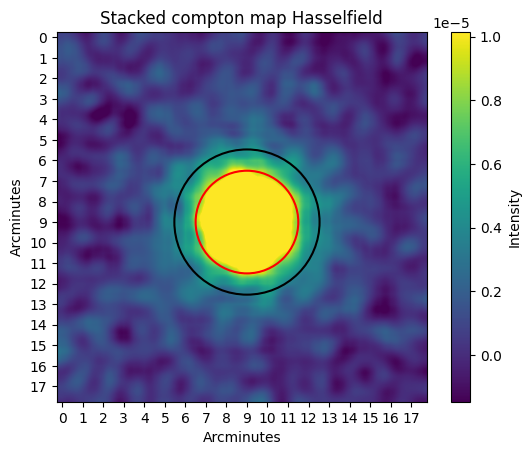

In [164]:
import scipy.ndimage

stacked_map = enmap.read_map("/Users/yi/Documents/CMB_SZ/stacked_map_hasselfield.fits")


#stacked_map = stacked_map[0]
def circular_mask(h, w,center=None, radius=None):
    if center is None:  # use the middle of the image
        center = [int(h/2), int(w/2)]
    if radius is None:  # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], h-center[0], w-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

    mask = dist_from_center <= radius
    return mask

def ring_mask(h, w,center=None, radius_inner=None, radius_outter = None ):
    if center is None:  # use the middle of the image
        center = [int(h/2), int(w/2)]

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

    mask = (dist_from_center <= radius_outter) & (dist_from_center >= radius_inner)
    return mask

radius = 2.5*2 # adjust this value as needed
radius_out  = radius*np.sqrt(2)
h, w = stacked_map.shape

mask = circular_mask(h, w, radius=radius)
mask_outter_ring = ring_mask(h, w, radius_inner=radius, radius_outter = radius_out)
tsz_signal_inner = np.mean(stacked_map[mask])
tsz_signal_outter_ring = np.mean(stacked_map[mask_outter_ring])
tsz_signal = tsz_signal_inner - tsz_signal_outter_ring

print(f"Extracted tSZ signal: {tsz_signal}")

# Optionally, plot the masked region
plt.imshow(stacked_map,cmap='viridis', norm = ImageNormalize(stacked_map, interval=ZScaleInterval()), interpolation="sinc")
#lt.colorbar(label='tSZ signal') vmin =-1.5e-5,
#plt.contour(mask_outter_ring,colors='red', linewidths=0.5)

radius = 2.5* resolution_factor  # arcmins
outter_radius = radius*np.sqrt(2)
circle = plt.Circle(
    (stacked_map.shape[1] // 2, stacked_map.shape[0] // 2), 
    radius, color='r', fill=False, linewidth=1.5
)
circle_outter = plt.Circle(
    (stacked_map.shape[1] // 2, stacked_map.shape[0] // 2), 
    outter_radius, color='black', fill=False, linewidth=1.5
)

# Add the circle to the plot
ax = plt.gca()
ax.add_artist(circle)
ax.add_artist(circle_outter)
# Set ticks every 2 pixels by resolution factor

ax.set_xticks(np.arange(0, stacked_map.shape[1], resolution_factor))
ax.set_yticks(np.arange(0, stacked_map.shape[0], resolution_factor))

# Adjust tick labels to count every 2 pixels as one unit
ax.set_xticklabels(np.arange(0, stacked_map.shape[1] // 2))
ax.set_yticklabels(np.arange(0, stacked_map.shape[0] // 2))
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Intensity')
# Set titles and labels
plt.title('Stacked compton map Hasselfield')
plt.xlabel('Arcminutes')
plt.ylabel('Arcminutes')

# Display the plot
plt.show()

## Now we are working with real luminosity bins

In [3]:
file_path = '/Users/yi/Documents/CMB_SZ/ACTxDESI/V20_DR15_Catalog_v3.csv'

we have to skip so many rows!

In [6]:
data = pd.read_csv(file_path, delimiter=',', skiprows=17)  # Example if the delimiter is "|"


In [7]:
# Apply the inverse white noise variance cut (45 µK cut for more conservative cuts)
data = data[(data['divcut'] == 2)]

# Apply the galactic plane masking cut (50% for conservativeness)
data = data[data['galcut'] == 2]

#data = data[data['PS'] == 2]
data = data[data['PS15mJy_cut'] == 1]
data = data[data['PS100mJy_cut'] == 1]

data = data[data['S16ILC'] == 1]

In [8]:
data

,ra,dec,lum,z,stellarmasses,halomasses,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,...,extinction_z,bestObjID,PS15mJy_cut,PS100mJy_cut,divcut,divcuts18,galcut,incompsepregion,S18coadd,S16ILC
641,205.121160,3.048728,5.127374e+10,0.488251,1.538212e+11,7.178504e+12,25.22820,22.05251,20.37763,19.37846,...,0.029197,1.237652e+18,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
642,205.082380,3.057991,6.365623e+10,0.236970,1.909687e+11,1.082192e+13,21.14751,19.15511,18.02938,17.49540,...,0.028840,1.237652e+18,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
643,205.172760,3.028108,7.253716e+10,0.430860,2.176115e+11,1.399373e+13,19.24835,21.18758,19.60757,18.87709,...,0.030229,1.237652e+18,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
644,205.260750,3.009577,1.419627e+11,0.551227,4.258880e+11,5.746375e+13,25.20802,21.92509,19.74206,18.11252,...,0.030406,1.237652e+18,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
645,205.589630,3.076840,5.586533e+09,0.162937,1.675960e+10,4.764930e+11,22.05774,20.54214,19.82174,18.89550,...,0.030706,1.237652e+18,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585572,16.281103,-1.501394,7.724354e+10,0.181931,2.317306e+11,1.587269e+13,20.13862,18.43705,17.29405,16.76160,...,0.078599,1.237679e+18,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
585573,16.255045,-1.461409,6.764171e+10,0.503232,2.029251e+11,1.218588e+13,27.35947,21.77146,20.40279,19.37095,...,0.077193,1.237679e+18,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
585695,18.123386,-2.299891,1.075851e+11,0.426185,3.227554e+11,3.152560e+13,22.38186,20.81024,19.21434,18.48077,...,0.059727,1.237679e+18,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
585899,18.492788,-2.325629,8.556392e+10,0.289820,2.566918e+11,1.954281e+13,22.45661,19.85612,18.31045,17.72879,...,0.067129,1.237679e+18,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0


In [9]:
import pandas as pd
import numpy as np
# Replace with the actual column names for RA and Dec in your catalog
ra_column = 'ra'
dec_column = 'dec'

# Initialize a dictionary to store coordinates for each bin
coordinates_by_bin = {bin_name: ([], [], [],[]) for bin_name in ['L43', 'L61', 'L79', 'L98', 'L116', 'L43D', 'L61D', 'L79D', 'L98D']}

# Iterate through each row to handle overlapping bins
for _, row in data.iterrows():
    luminosity = row['lum']  # Replace 'Luminosity' with the actual column name
    z = row['z']
    ra = row[ra_column]
    dec = row[dec_column]
    # Check each bin condition and append coordinates to the corresponding bin
    if luminosity > 4.30e10:
        coordinates_by_bin['L43'][0].append(ra)
        coordinates_by_bin['L43'][1].append(dec)
        coordinates_by_bin['L43'][2].append(luminosity)
        coordinates_by_bin['L43'][3].append(z)
    if luminosity > 6.10e10:
        coordinates_by_bin['L61'][0].append(ra)
        coordinates_by_bin['L61'][1].append(dec)
        coordinates_by_bin['L61'][2].append(luminosity)
        coordinates_by_bin['L61'][3].append(z)
    if luminosity > 7.90e10:
        coordinates_by_bin['L79'][0].append(ra)
        coordinates_by_bin['L79'][1].append(dec)
        coordinates_by_bin['L79'][2].append(luminosity)
        coordinates_by_bin['L79'][3].append(z)
    if luminosity > 9.80e10:
        coordinates_by_bin['L98'][0].append(ra)
        coordinates_by_bin['L98'][1].append(dec)
        coordinates_by_bin['L98'][2].append(luminosity)
        coordinates_by_bin['L98'][3].append(z)
    if luminosity > 11.60e10:
        coordinates_by_bin['L116'][0].append(ra)
        coordinates_by_bin['L116'][1].append(dec)
        coordinates_by_bin['L116'][2].append(luminosity)
        coordinates_by_bin['L116'][3].append(z)
    if 4.30e10 < luminosity <= 6.10e10:
        coordinates_by_bin['L43D'][0].append(ra)
        coordinates_by_bin['L43D'][1].append(dec)
        coordinates_by_bin['L43D'][2].append(luminosity)
        coordinates_by_bin['L43D'][3].append(z)
    if 6.10e10 < luminosity <= 7.90e10:
        coordinates_by_bin['L61D'][0].append(ra)
        coordinates_by_bin['L61D'][1].append(dec)
        coordinates_by_bin['L61D'][2].append(luminosity)
        coordinates_by_bin['L61D'][3].append(z)
    if 7.90e10 < luminosity <= 9.80e10:
        coordinates_by_bin['L79D'][0].append(ra)
        coordinates_by_bin['L79D'][1].append(dec)
        coordinates_by_bin['L79D'][2].append(luminosity)
        coordinates_by_bin['L79D'][3].append(z)
    if 9.80e10 < luminosity <= 11.60e10:
        coordinates_by_bin['L98D'][0].append(ra)
        coordinates_by_bin['L98D'][1].append(dec)
        coordinates_by_bin['L98D'][2].append(luminosity)
        coordinates_by_bin['L98D'][3].append(z)

# Convert lists to arrays for each bin
for bin_name in coordinates_by_bin:
    coordinates_by_bin[bin_name] = (np.array(coordinates_by_bin[bin_name][0]), np.array(coordinates_by_bin[bin_name][1]),np.array(coordinates_by_bin[bin_name][2]),np.array(coordinates_by_bin[bin_name][3]))

# Example: Access coordinates for a specific bin
example_bin = "L43D"  # Replace with the bin you want
if example_bin in coordinates_by_bin:
    ra_coords, dec_coords, luminosity, redshift = coordinates_by_bin[example_bin]
    print(f"Coordinates for bin {example_bin}:")
    print("RA:", ra_coords)
    print("Dec:", dec_coords)
    print("Luminosity:", luminosity)
    print("redshift:", redshift)
else:
    print(f"No data for bin {example_bin}")


Coordinates for bin L43D:
RA: [205.12116  206.97424  207.67749  ...  15.62307   15.714172  15.76626 ]
Dec: [ 3.0487284  3.1034034  3.1440381 ... -1.5128333 -1.4186257 -1.4876477]
Luminosity: [5.12737376e+10 4.76213741e+10 5.42113180e+10 ... 4.84774884e+10
 4.32421090e+10 5.62067761e+10]
redshift: [0.4882512 0.608934  0.6152392 ... 0.4719037 0.5211313 0.6334445]


### Verify the bin works, the following two number should be same

In [10]:
len(coordinates_by_bin['L43'][3])

190551

In [11]:
print(len(coordinates_by_bin['L43D'][1])+ len(coordinates_by_bin['L61D'][1])+ len(coordinates_by_bin['L79D'][1])+ len(coordinates_by_bin['L98D'][1]))
print(len(coordinates_by_bin['L43'][1])-len(coordinates_by_bin['L116'][1]))

177274
177274


In [12]:
coordinates_by_bin['L116'][2][0]

141962655632.47366

In [16]:
pix_arcmin = 0.5  #each pixel is 0.5 arcmins 
resolution_factor =  1/pix_arcmin 

def extract_submaps_v1(fits_file, ra, dec, output_dir, submap_size=18.0):

    map_data = enmap.read_map(fits_file, hdu=0)
    if len()
    wcs = map_data.wcs
    
    #catalog_hdulist = fits.open(catalog_file)
    #catalog_data = catalog_hdulist[1].data

    #ra = catalog_data['RADeg']
    #dec = catalog_data['decDeg']
    #mass = catalog_data['M500c']
    
    # below are coordinated copied from table 7 of Hassefield paper
    #ra = [2.0418, 3.0152, 3.7276, 4.4138, 4.5623, 5.5553, 6.5699, 11.1076, 11.3051, 12.7875, 14.5189, 14.7855, 16.2195, 19.9971, 21.8227, 24.8407, 28.1764, 29.1008, 31.5567, 33.8699, 34.5626, 34.9533, 34.9759, 35.3925, 35.7939, 37.1250, 37.7273, 39.9718, 40.0102, 40.3129, 41.4645, 42.5370, 44.1354, 45.2925, 45.4158, 45.8343, 47.0481, 50.1239, 51.7075, 54.2438, 55.5008, 55.6845, 57.1612, 57.1605, 306.3006, 312.6264, 312.6814, 312.7935, 312.7885, 313.8581, 314.7234, 322.1036, 322.4186, 322.5367, 323.7907, 323.8151, 323.9310, 328.2375, 328.6319, 329.0407, 335.1922, 337.3042, 343.3432, 345.6427, 346.9176, 351.8660, 354.4156, 357.9349]
    #dec = [2.0204, -0.7693, -0.9502, -0.8580, -0.3795, -0.6050, 1.3367, 1.2221, -1.8827, 0.9323, 0.5106, -0.8326, 0.0495, 0.9193, 0.3468, -1.4769, 1.0059, -1.3879, -1.2428, 0.5091, -0.6883, 0.3755, 1.4973, -0.2063, -0.9466, 0.5033, -0.4043, -1.5758, 1.2693, -0.3109, -0.7013, 0.1403, 0.1049, -1.1716, 1.9219, 1.9214, 1.0607, 0.5399, -0.7312, -1.1705, 1.0873, -0.2899, 0.4892, -0.4681, 0.5130, -0.9311, 1.3857, 0.9488, 2.2628, 1.0985, 1.3836, 1.5996, 0.0891, 0.7590, -1.0396, 1.4247, 0.1568, -1.2458, -0.8197, 1.3857, -0.7095, -0.0743, -0.5280, 0.0419, 1.5161, -2.0777, 0.2690, 0.1538]
    
    # Define submap size in arcminutes and convert to radians
    submap_size_rad = np.deg2rad(submap_size / 60.0)
    total_items = len(ra)
    milestones = [total_items * i // 10 for i in range(1, 11)]
    for i, (ra_source, dec_source) in enumerate(zip(ra, dec)):

        pos = np.deg2rad([dec_source, ra_source])  # [DEC, RA] in radians
        # bounding box for the submap
        box = np.array([[pos[0] - submap_size_rad / 2, pos[1] - submap_size_rad / 2],
                        [pos[0] + submap_size_rad / 2, pos[1] + submap_size_rad / 2]])
        
        # Check if the current iteration hits a milestone
        if i + 1 in milestones:  # i + 1 because progress is 1-based
            progress = (i + 1) / total_items * 100
            print(f"extraction: {int(progress)}% complete")
        submap = enmap.submap(map_data, box=box)
        if submap.shape[0] != 36 or submap.shape[1] != 36: 
            print([dec_source, ra_source], submap.shape)

        # Save the submap to a FITS file
        submap_filename = f"{output_dir}/submap_{i}.fits"
        enmap.write_map(submap_filename, submap)
    
    print("Extraction complete!")
        
    

    print("Submaps extraction completed.")

    

In [17]:
Bin_name = 'L116'

fits_file = filename = Home + '/ACTxDESI/s22_product/act_planck_s08_s22_ftot_night_map.fits'
#catalog_file = '/Users/yi/Documents/CMB_SZ/DR5_cluster-catalog_v1.1.fits'
base_output_path = "/Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/"

# Combine them to create the full path
output_dir = f"{base_output_path}{Bin_name}"

#output_dir = "/Users/yi/Documents/CMB_SZ/ACTxDESI/DR15_submap/L98D/"

ra = coordinates_by_bin[Bin_name][0]
dec = coordinates_by_bin[Bin_name][1]
Lum = coordinates_by_bin[Bin_name][2]
z = coordinates_by_bin[Bin_name][3]
extract_submaps_v1(fits_file, ra, dec, output_dir)
Lum_mean = sum(Lum)/len(Lum)
z_mean = sum(z)/len(z)
print ('the avergae luminosity and redshift of this bin is',Lum_mean, z_mean,'Total number of sources in this bin is', len(Lum))


[3.0095766, 205.26075] (3, 36, 36)
[3.3379495, 206.60999] (3, 36, 36)
[4.6607819, 210.98908] (3, 36, 36)
[4.4921848, 212.06218] (3, 36, 36)
[5.0833142, 211.10175] (3, 36, 36)
[5.062927200000002, 211.35367] (3, 36, 36)
[4.9986731, 212.06029] (3, 36, 36)
[4.9676117, 212.14628] (3, 36, 36)
[3.8068655, 206.01827] (3, 36, 36)
[3.7358877, 208.2243] (3, 36, 36)
[3.6884646, 209.51105] (3, 36, 36)
[4.1821594, 204.75363] (3, 36, 36)
[4.08641, 207.09008] (3, 36, 36)
[4.0820032, 208.80152] (3, 36, 36)
[4.0904069, 210.55003] (3, 36, 36)
[4.652332299999999, 205.53923] (3, 36, 36)
[4.4842107, 206.39591] (3, 36, 36)
[4.5017511, 206.63239] (3, 36, 36)
[4.620800900000001, 206.95805] (3, 36, 36)
[4.5911749, 208.1091] (3, 36, 36)
[4.4677839000000015, 208.43201] (3, 36, 36)
[4.4656114, 210.33257000000003] (3, 36, 36)
[4.4547023, 210.80926] (3, 36, 36)
[-1.1819805, 202.69961] (3, 36, 36)
[4.9763875, 208.67468] (3, 36, 36)
[4.9154843, 210.69489] (3, 36, 36)
[-1.1083047, 207.56082] (3, 36, 36)
[-0.77005877, 2

In [18]:
submap_dir = f"{base_output_path}{Bin_name}"
base_path_stacking = "/Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/stacked_map"
output_file =f"{base_path_stacking}{Bin_name}_stacked.fits"
stack_submaps(submap_dir, output_file)

This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_10393.fits has shape (3, 36, 36) Total bad submap 1
This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_5577.fits has shape (3, 36, 36) Total bad submap 2
This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_2748.fits has shape (3, 36, 36) Total bad submap 3
This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_12654.fits has shape (3, 36, 36) Total bad submap 4
This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_10669.fits has shape (3, 36, 36) Total bad submap 5
This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_1867.fits has shape (3, 36, 36) Total bad submap 6
This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_8345.fits has shape (3, 36, 36) Total bad submap 7
This file /Users/yi/Documents/CMB_SZ/ACTxDESI/s22_submap/L116/submap_5127.fits has shape (3, 36, 36) Total bad submap 8
This file /Users/yi/Documents/CMB_SZ/

/var/folders/t2/dlv66srx743g81cmz1pqw0200000gn/T/ipykernel_1592/3582360224.py:31: RuntimeWarning: invalid value encountered in divide
  stack /= count


Extracted tSZ signal: 1.231234421084082e-07


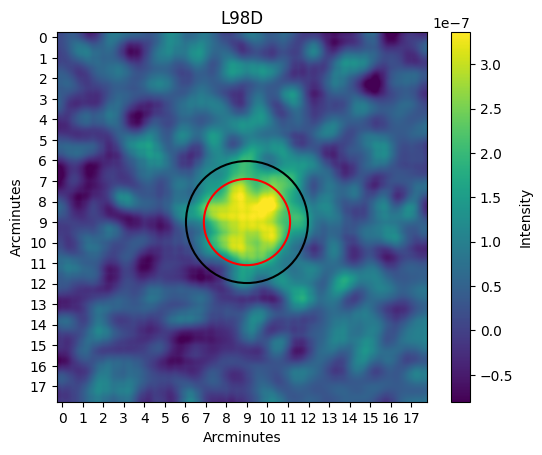

In [271]:
import scipy.ndimage

#stacked_map = enmap.read_map("/Users/yi/Documents/CMB_SZ/ACTxDESI/DR15_submap/stacked_map/L98D_stacked.fits")
stacked_map = enmap.read_map(output_file)
#stacked_map = stacked_map[0]
def circular_mask(h, w,center=None, radius=None):
    if center is None:  # use the middle of the image
        center = [int(h/2), int(w/2)]
    if radius is None:  # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], h-center[0], w-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

    mask = dist_from_center <= radius
    return mask

def ring_mask(h, w,center=None, radius_inner=None, radius_outter = None ):
    if center is None:  # use the middle of the image
        center = [int(h/2), int(w/2)]

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

    mask = (dist_from_center <= radius_outter) & (dist_from_center >= radius_inner)
    return mask

radius = 2.1*2 # adjust this value as needed
radius_out  = radius*np.sqrt(2)
h, w = stacked_map.shape

mask = circular_mask(h, w, radius=radius)
mask_outter_ring = ring_mask(h, w, radius_inner=radius, radius_outter = radius_out)
tsz_signal_inner = np.mean(stacked_map[mask])
tsz_signal_outter_ring = np.mean(stacked_map[mask_outter_ring])
tsz_signal = tsz_signal_inner - tsz_signal_outter_ring

print(f"Extracted tSZ signal: {tsz_signal}")

# Optionally, plot the masked region
plt.imshow(stacked_map,cmap='viridis', norm = ImageNormalize(stacked_map, interval=ZScaleInterval()), interpolation="sinc")
#lt.colorbar(label='tSZ signal') vmin =-1.5e-5,
#plt.contour(mask_outter_ring,colors='red', linewidths=0.5)

radius = 2.1* resolution_factor  # arcmins
outter_radius = radius*np.sqrt(2)
circle = plt.Circle(
    (stacked_map.shape[1] // 2, stacked_map.shape[0] // 2), 
    radius, color='r', fill=False, linewidth=1.5
)
circle_outter = plt.Circle(
    (stacked_map.shape[1] // 2, stacked_map.shape[0] // 2), 
    outter_radius, color='black', fill=False, linewidth=1.5
)

# Add the circle to the plot
ax = plt.gca()
ax.add_artist(circle)
ax.add_artist(circle_outter)
# Set ticks every 2 pixels by resolution factor

ax.set_xticks(np.arange(0, stacked_map.shape[1], resolution_factor))
ax.set_yticks(np.arange(0, stacked_map.shape[0], resolution_factor))

# Adjust tick labels to count every 2 pixels as one unit
ax.set_xticklabels(np.arange(0, stacked_map.shape[1] // 2))
ax.set_yticklabels(np.arange(0, stacked_map.shape[0] // 2))
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Intensity')
# Set titles and labels
plt.title(Bin_name)
plt.xlabel('Arcminutes')
plt.ylabel('Arcminutes')
plt.savefig(f"{base_path_stacking}{Bin_name}_stacked.png")
# Display the plot
plt.show()